TASK-1

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Custom colour palette (modern blue-orange tone)
palette = ['#004c6d', '#ffb347', '#a7c7e7', '#e06c75', '#98c379']
sns.set_palette(palette)
sns.set(rc={
    "axes.facecolor": "#f9f9f9",
    "figure.facecolor": "#ffffff",
    "axes.grid": True,
    "grid.color": "#e5e5e5"
})
cmap = ListedColormap(palette)
plt.style.use('seaborn-v0_8-whitegrid')




DATASET LOADING

In [ ]:
# Load data
file_path = 'accepted_2007_to_2018Q4.csv'  # adjust path
df = pd.read_csv(file_path, low_memory=False)
print(f"Loaded dataset with shape: {df.shape}")

# Filter to completed loans only
completed_statuses = [
    'Fully Paid', 'Charged Off', 'Default',
    'Late (31-120 days)', 'Late (16-30 days)',
    'Does not meet the credit policy. Status:Fully Paid',
    'Does not meet the credit policy. Status: Charged Off'
]

df = df[df['loan_status'].isin(completed_statuses)].copy()
print(f"Filtered to completed loans: {df.shape[0]:,} rows")

# Show distribution
print("\nLoan status distribution:")
print(df['loan_status'].value_counts())

# Binary target for stratified sampling
target_map = {
    'Fully Paid': 0, 'Charged Off': 1, 'Default': 1,
    'Late (31-120 days)': 1, 'Late (16-30 days)': 1,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status: Charged Off': 1
}
temp_target = df['loan_status'].map(target_map)

# Stratified sampling (up to 50k)
sample_size = min(50000, len(df))
df, _ = train_test_split(df, train_size=sample_size, stratify=temp_target, random_state=42)

print(f"\nFinal sampled dataset: {df.shape}")


Loaded dataset with shape: (386394, 151)
Filtered to completed loans: 345,302 rows

Loan status distribution:
loan_status
Fully Paid            274362
Charged Off            69388
Late (31-120 days)      1280
Late (16-30 days)        271
Default                    1
Name: count, dtype: int64

Final sampled dataset: (50000, 151)


In [ ]:
# Convert loan_status to binary (0=paid, 1=default)
status_map = {
    'Fully Paid': 0, 'Charged Off': 1, 'Default': 1,
    'Late (31-120 days)': 1, 'Late (16-30 days)': 1,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 1
}

print("\nBinary mapping:")
print("  0: Paid (Fully Paid, Policy-Fully Paid)")
print("  1: Default (Charged Off, Default, Late, Policy-Charged Off)")

df['loan_status_binary'] = df['loan_status'].map(status_map).astype(int)

# Class distribution
class_dist = df['loan_status_binary'].value_counts().sort_index()

print(f"\nClass distribution:")
for cls, count in class_dist.items():
    label = "Paid" if cls == 0 else "Default"
    print(f"  {cls} ({label}): {count:,} ({count/len(df)*100:.1f}%)")



Binary mapping:
  0: Paid (Fully Paid, Policy-Fully Paid)
  1: Default (Charged Off, Default, Late, Policy-Charged Off)

Class distribution:
  0 (Paid): 39,728 (79.5%)
  1 (Default): 10,272 (20.5%)


In [ ]:
# Display first few rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_binary
141906,60277044,NaN,18000.0,18000.0,18000.0,60 months,14.65,424.92,C,C5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
55947,65273666,NaN,8400.0,8400.0,8400.0,36 months,13.67,285.75,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
143213,60266265,NaN,5150.0,5150.0,5150.0,36 months,12.69,172.76,C,C2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
318019,46315542,NaN,20000.0,20000.0,20000.0,36 months,6.68,614.62,A,A3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
368745,40440624,NaN,12000.0,12000.0,12000.0,36 months,6.68,368.78,A,A3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
print("Dataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 141906 to 221144
Columns: 152 entries, id to loan_status_binary
dtypes: float64(114), int64(2), object(36)
memory usage: 58.4+ MB
None

Missing Values:
id                           0
member_id                50000
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
                         ...  
settlement_date          48460
settlement_amount        48460
settlement_percentage    48460
settlement_term          48460
loan_status_binary           0
Length: 152, dtype: int64

Statistics:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,loan_status_binary
count,5.000000e+04,0.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,...,296.000000,296.0,296.000000,232.00000,296.000000,296.000000,1540.000000,1540.000000,1540.000000,50000.000000
mean,5.520150e+07,NaN,14679.431500,14679.431500,14673.632500,12.366311,438.193413,7.648161e+04,18.958157,0.344400,...,120.404426,3.0,14.618243,335.65875,9483.214088,198.000034,4933.937000,47.244513,13.028571,0.205440
std,8.652392e+06,NaN,8559.570084,8559.570084,8556.231035,4.325704,252.365432,8.445429e+04,9.247249,0.912362,...,99.439925,0.0,9.693587,285.86286,6438.264734,194.855157,3589.818856,6.071500,7.647563,0.404027
min,7.000000e+04,NaN,1000.000000,1000.000000,925.000000,5.320000,14.770000,1.200000e+03,0.000000,0.000000,...,3.730000,3.0,0.000000,11.19000,471.380000,0.080000,133.000000,20.000000,0.000000,0.000000
25%,4.801136e+07,NaN,8000.000000,8000.000000,8000.000000,9.170000,255.040000,4.520375e+04,12.450000,0.000000,...,38.870000,3.0,7.000000,101.16750,3933.050000,44.297500,2032.777500,45.000000,6.000000,0.000000
50%,5.606174e+07,NaN,12600.000000,12600.000000,12600.000000,12.290000,377.040000,6.500000e+04,18.370000,0.000000,...,93.300000,3.0,15.000000,221.28000,8585.835000,139.300000,4297.295000,45.000000,12.000000,0.000000
75%,6.232544e+07,NaN,20000.000000,20000.000000,20000.000000,14.650000,578.790000,9.000000e+04,25.050000,0.000000,...,176.365000,3.0,23.000000,490.93500,13747.127500,303.022500,6930.162500,50.000000,18.000000,0.000000
max,6.861653e+07,NaN,35000.000000,35000.000000,35000.000000,28.990000,1391.410000,8.900060e+06,672.520000,26.000000,...,472.660000,3.0,30.000000,1262.94000,27845.720000,984.730000,24942.920000,80.000000,32.000000,1.000000


Exploratory Data Analysis

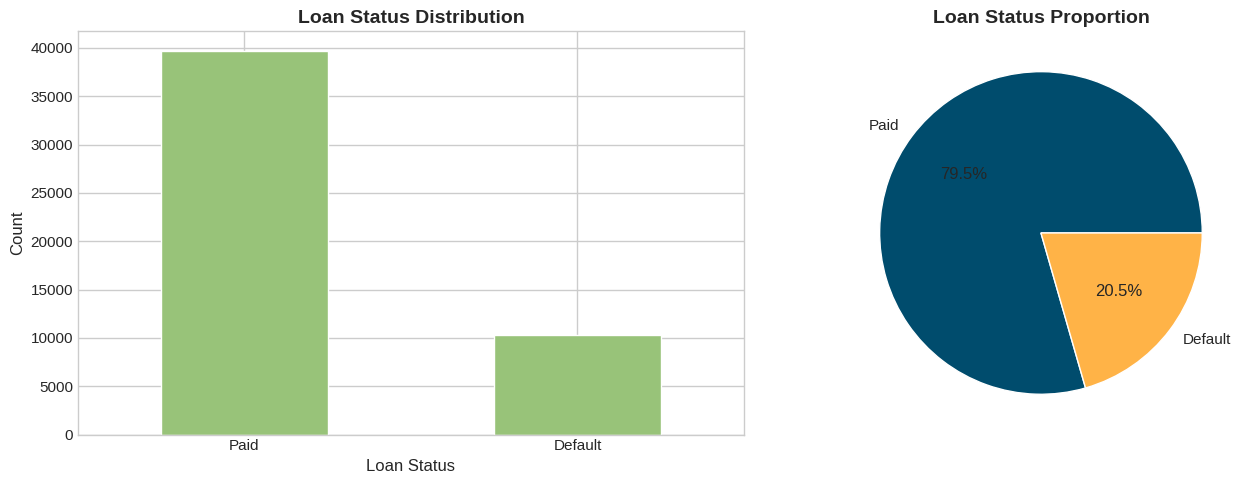


Class Distribution:
  Paid:    39,728 (79.5%)
  Default: 10,272 (20.5%)
  Default Rate: 20.54%


In [22]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
value_counts = df['loan_status_binary'].value_counts().sort_index()
value_counts.plot(kind='bar', ax=axes[0], color= palette[-1] )
axes[0].set_title('Loan Status Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Set tick labels dynamically based on available classes
tick_labels = ['Paid' if i == 0 else 'Default' for i in value_counts.index]
axes[0].set_xticklabels(tick_labels, rotation=0)

# Pie chart
value_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                  colors=palette [:len(value_counts)],
                  labels=tick_labels)
axes[1].set_title('Loan Status Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\nClass Distribution:")
print(f"  Paid:    {(df['loan_status_binary']==0).sum():,} ({(df['loan_status_binary']==0).mean()*100:.1f}%)")
print(f"  Default: {(df['loan_status_binary']==1).sum():,} ({(df['loan_status_binary']==1).mean()*100:.1f}%)")
print(f"  Default Rate: {df['loan_status_binary'].mean()*100:.2f}%")


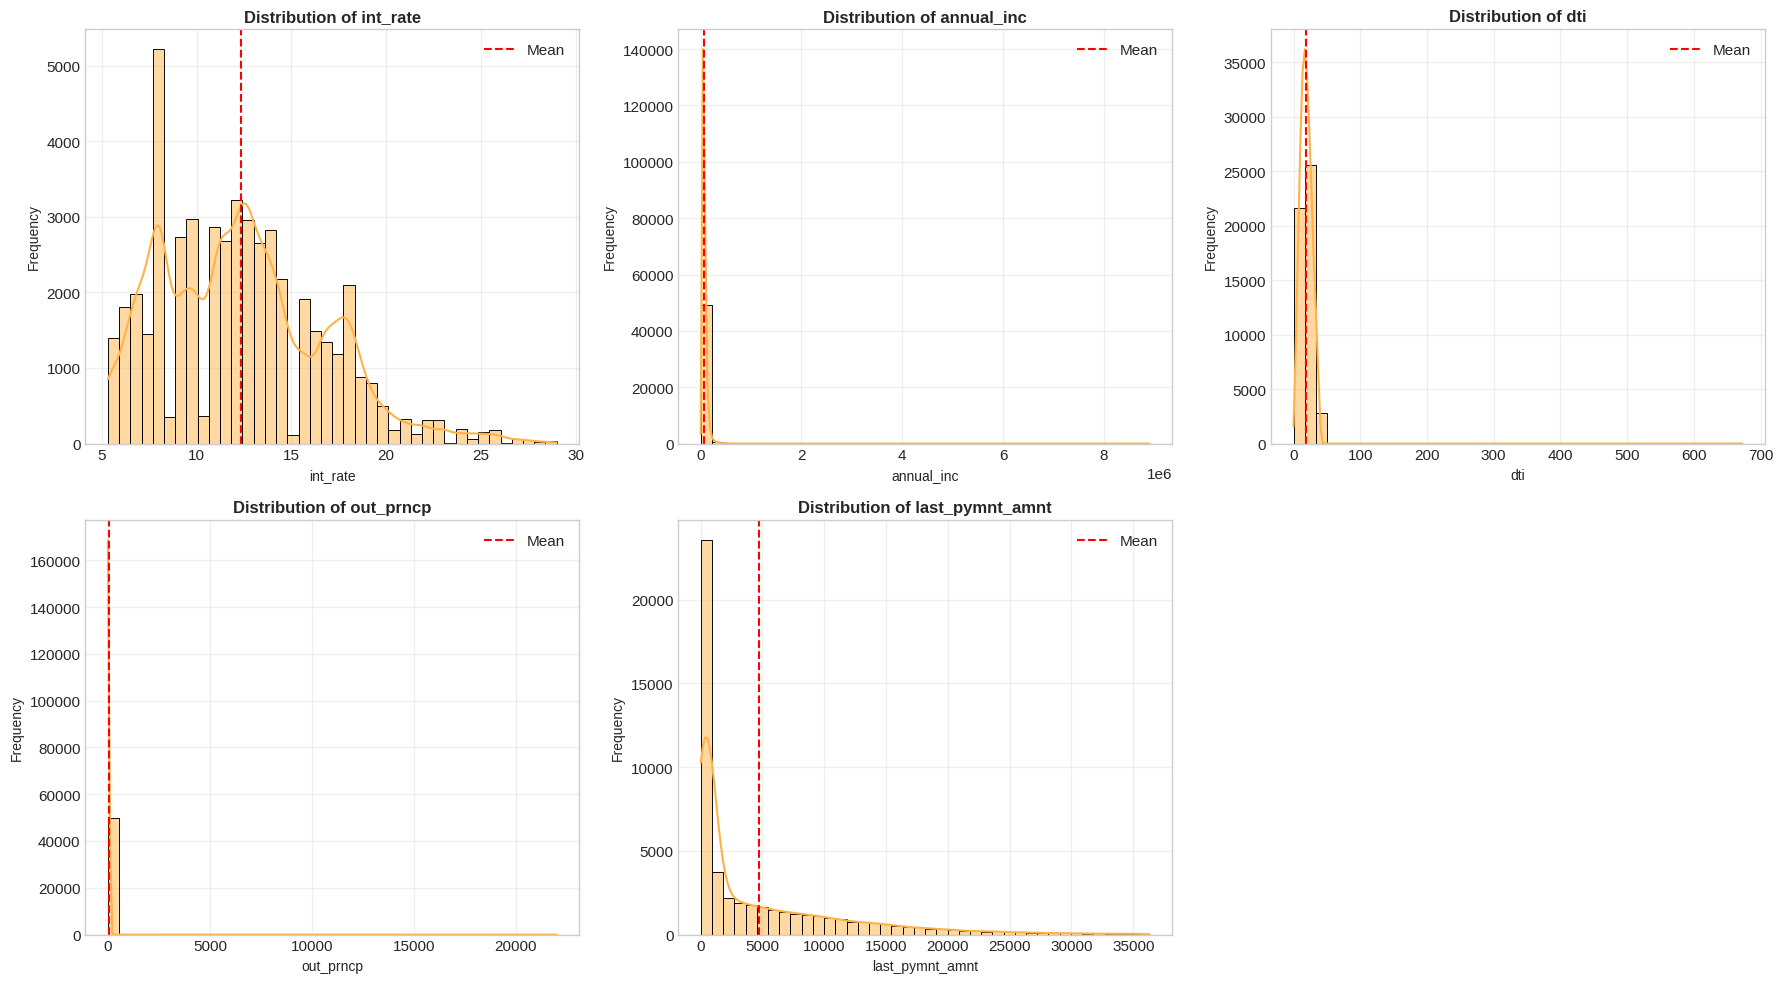

In [27]:
# --- Distribution of Key Numerical Features ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    if idx < len(axes):
        sns.histplot(df[col], bins=40, kde=True, ax=axes[idx], color=palette[1], edgecolor='black')
        axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].legend()
        axes[idx].grid(alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


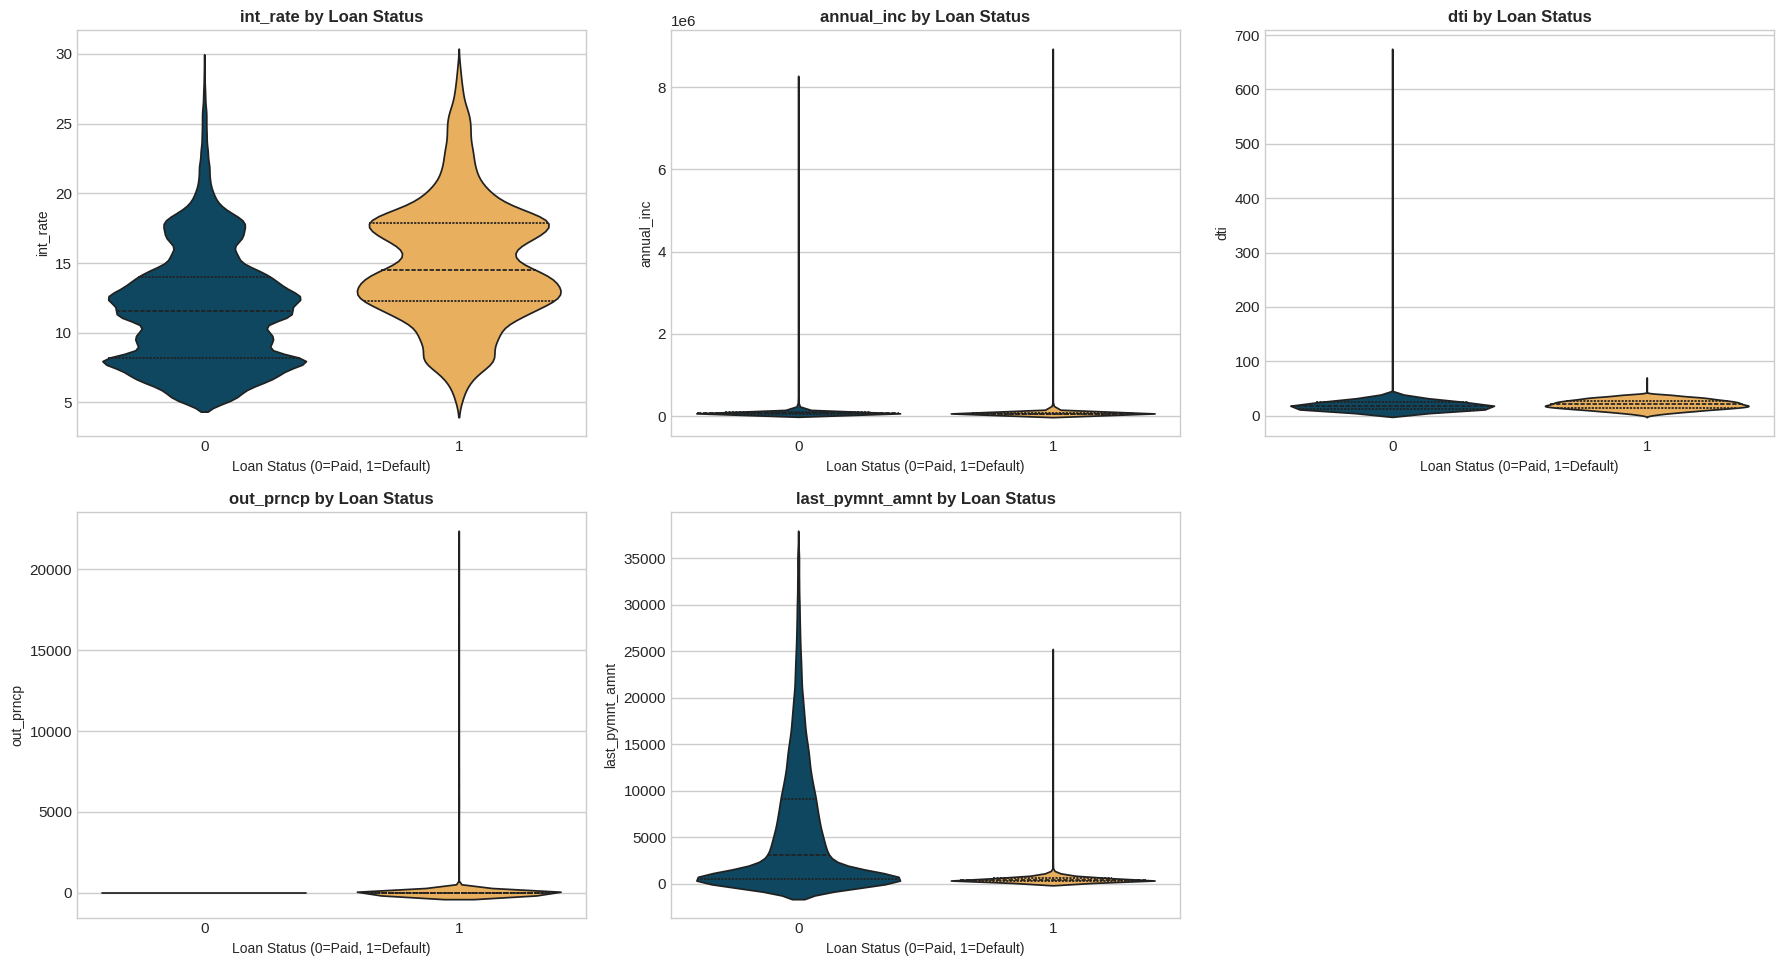

In [28]:
# --- Feature Comparison by Loan Status ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    if idx < len(axes):
        sns.violinplot(data=df, x='loan_status_binary', y=col, ax=axes[idx],
                       palette=palette[:2], inner='quartile')
        axes[idx].set_title(f'{col} by Loan Status', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Loan Status (0=Paid, 1=Default)', fontsize=10)
        axes[idx].set_ylabel(col, fontsize=10)

for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('')
plt.tight_layout()
plt.show()


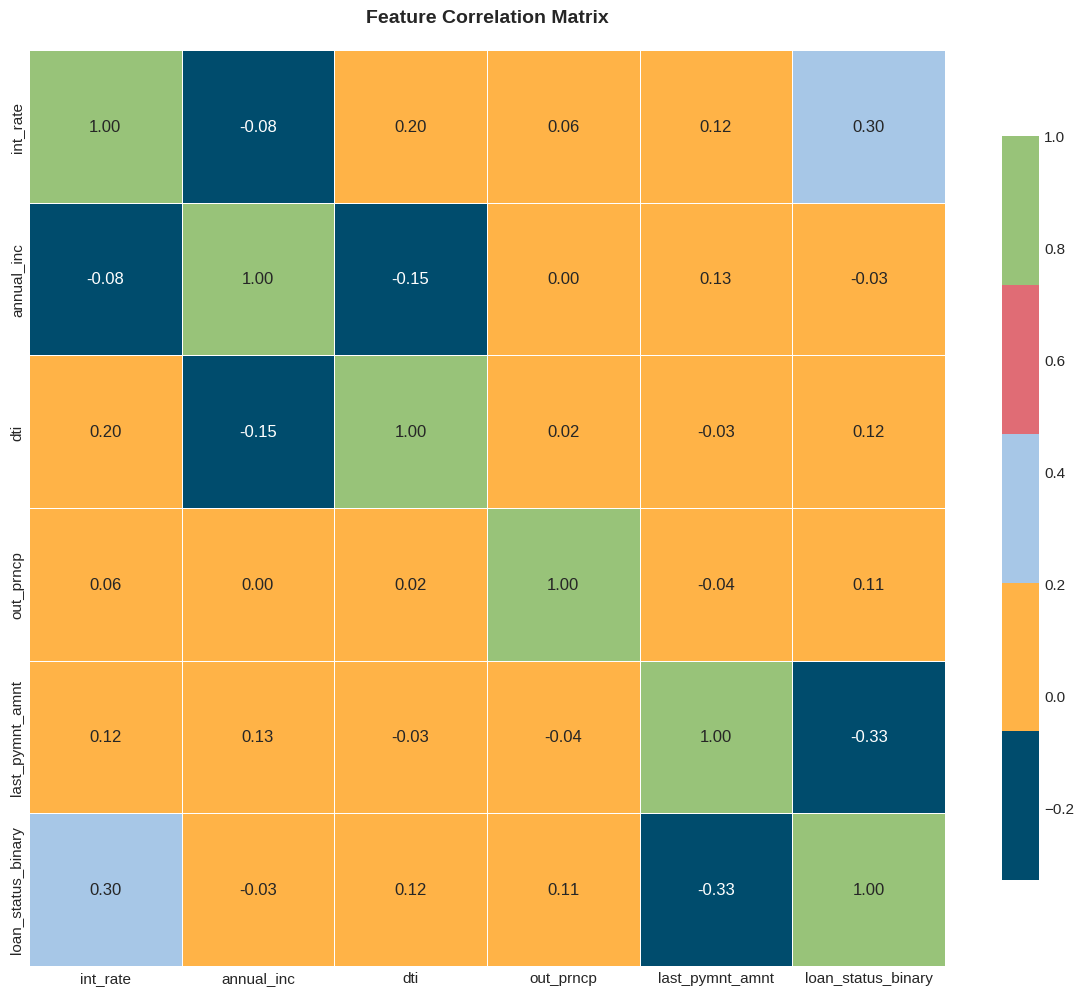

In [25]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + ['loan_status_binary']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap= cmap,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


Data Preprocessing

In [31]:
# DATA PREPROCESSING & FEATURE ENGINEERING

# STEP 1: CLEANING STRING COLUMNS

# Interest rate: '10.5%' to 0.105
if df['int_rate'].dtype == 'object':
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100

# Revolving utilisation: '85.5%' to 85.5
if 'revol_util' in df.columns and df['revol_util'].dtype == 'object':
    df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

# Employment length: '10+ years' to 10
if 'emp_length' in df.columns and df['emp_length'].dtype == 'object':
    df['emp_length'] = df['emp_length'].str.extract('(\d+)').fillna(0).astype(int)


# Loan term: ' 36 months' to 36
if 'term' in df.columns and df['term'].dtype == 'object':
    df['term'] = df['term'].str.extract('(\d+)').fillna(0).astype(int)

# STEP 2: CREATING UNIFIED FICO SCORE"

# The dataset has multiple FICO columns, let's unify them
fico_cols = [col for col in df.columns if 'fico' in col.lower()]

if fico_cols:
    # we have a range
    if 'fico_range_low' in df.columns and 'fico_range_high' in df.columns:
        df['fico_score'] = (df['fico_range_low'] + df['fico_range_high']) / 2
    # Otherwise
    elif len(fico_cols) > 0:
        df['fico_score'] = df[fico_cols[0]]
else:
    # No FICO data, let's handle it
    df['fico_score'] = 700  #(default value = 700 US average)


# STEP 3: FEATURE SELECTION & VALIDATION


# These are the features we'd LIKE to use
desired_features = {
    # Numeric features
    'loan_amnt': 'Loan amount requested','int_rate': 'Interest rate','instalment': 'Monthly payment','annual_inc': 'Annual income',
    'dti': 'Debt-to-income ratio','fico_score': 'FICO credit score','revol_bal': 'Revolving balance','revol_util': 'Revolving utilisation %',
    'out_prncp': 'Outstanding principal','last_pymnt_amnt': 'Last payment amount','tot_cur_bal': 'Total current balance',
    'total_rev_hi_lim': 'Total revolving limit','emp_length': 'Employment length (years)',
    # Categorical features
    'home_ownership': 'Home ownership status','purpose': 'Loan purpose'}

# Let's see what we actually have
available = []
missing = []

for feature, description in desired_features.items():
    if feature in df.columns:
        available.append(feature)
        print(f" {feature:<25} {description}")
    else:
        missing.append(feature)
        print(f" {feature:<25} {description} [NOT FOUND]")

# STEP 4: HANDLING MISSING VALUES

# Check each available feature for nulls
missing_info = df[available].isnull().sum()
features_with_nulls = missing_info[missing_info > 0]

if len(features_with_nulls) > 0:
    for feature, null_count in features_with_nulls.items():
        null_pct = (null_count / len(df)) * 100

    # Numeric features: fill with median
    numeric_features = df[available].select_dtypes(include=[np.number]).columns
    for col in numeric_features:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)


    # Categorical features: fill with mode
    categorical_features = df[available].select_dtypes(include=['object']).columns
    for col in categorical_features:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)

# STEP 5: ENCODING CATEGORICAL VARIABLES

categorical_to_encode = ['home_ownership', 'purpose']
encoded_columns = []

for cat_feature in categorical_to_encode:
    if cat_feature in available:
        # Create a label encoder
        le = LabelEncoder()

        # Encode the feature
        encoded_name = f'{cat_feature}_encoded'
        df[encoded_name] = le.fit_transform(df[cat_feature])
        encoded_columns.append(encoded_name)

        # Show what we did
        n_categories = len(le.classes_)

# STEP 6: FINALIZING FEATURE SET")

# Our final features = numeric features + encoded categorical features
numeric_features = [f for f in available if f not in categorical_to_encode]
final_features = numeric_features + encoded_columns


# STEP 7: TRAIN-TEST SPLIT"

X = df[final_features].copy()
y = df['loan_status_binary'].copy()


# Let's check our target distribution BEFORE splitting
print("\n📊 Target Distribution (Overall):")
for class_val in sorted(y.unique()):
    count = (y == class_val).sum()
    pct = (y == class_val).mean() * 100
    label = "Paid" if class_val == 0 else "Default"
    print(f"   {class_val} ({label:<7}): {count:>8,} samples ({pct:>5.1f}%)")

# STEP 8: FEATURE SCALING (Optional but recommended for models like Logistic Regression, SVM)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Feature scaling complete. Data is ready for modeling.")


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)


 loan_amnt                 Loan amount requested
 int_rate                  Interest rate
 instalment                Monthly payment [NOT FOUND]
 annual_inc                Annual income
 dti                       Debt-to-income ratio
 fico_score                FICO credit score
 revol_bal                 Revolving balance
 revol_util                Revolving utilisation %
 out_prncp                 Outstanding principal
 last_pymnt_amnt           Last payment amount
 tot_cur_bal               Total current balance
 total_rev_hi_lim          Total revolving limit
 emp_length                Employment length (years)
 home_ownership            Home ownership status
 purpose                   Loan purpose

📊 Target Distribution (Overall):
   0 (Paid   ):   39,728 samples ( 79.5%)
   1 (Default):   10,272 samples ( 20.5%)

✅ Feature scaling complete. Data is ready for modeling.


Model Training

Logistic Regression  | Accuracy: 0.8563 | Recall: 0.5389 | F1: 0.6064 | AUC: 0.9132
Random Forest        | Accuracy: 0.8807 | Recall: 0.6037 | F1: 0.6752 | AUC: 0.9375
Gradient Boosting    | Accuracy: 0.8843 | Recall: 0.6139 | F1: 0.6855 | AUC: 0.9420
Neural Network (MLP) | Accuracy: 0.8787 | Recall: 0.6490 | F1: 0.6873 | AUC: 0.9327


<Figure size 500x500 with 0 Axes>

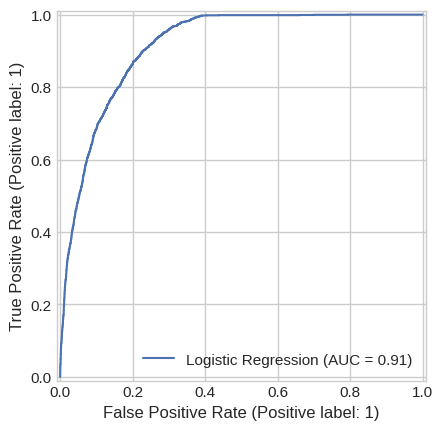

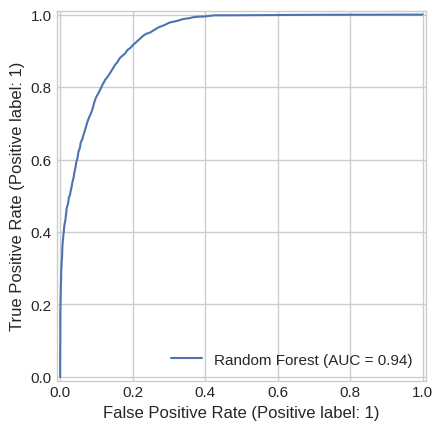

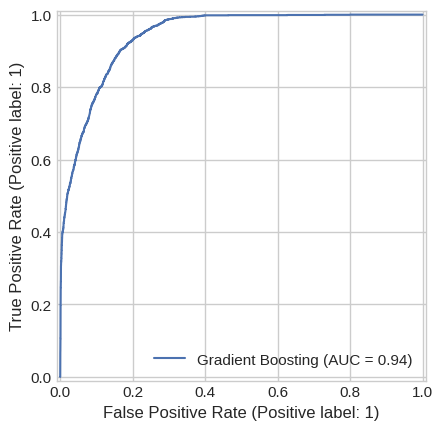

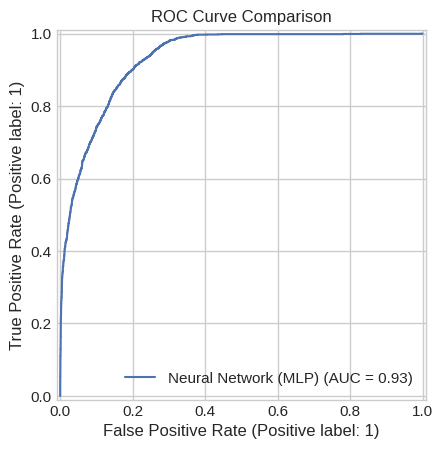


Summary of Model Results:
                  Model  Accuracy    Recall        F1       AUC
0   Logistic Regression    0.8563  0.538948  0.606409  0.913216
1         Random Forest    0.8807  0.603700  0.675197  0.937508
2     Gradient Boosting    0.8843  0.613924  0.685512  0.942027
3  Neural Network (MLP)    0.8787  0.648978  0.687291  0.932748


<Figure size 700x500 with 0 Axes>

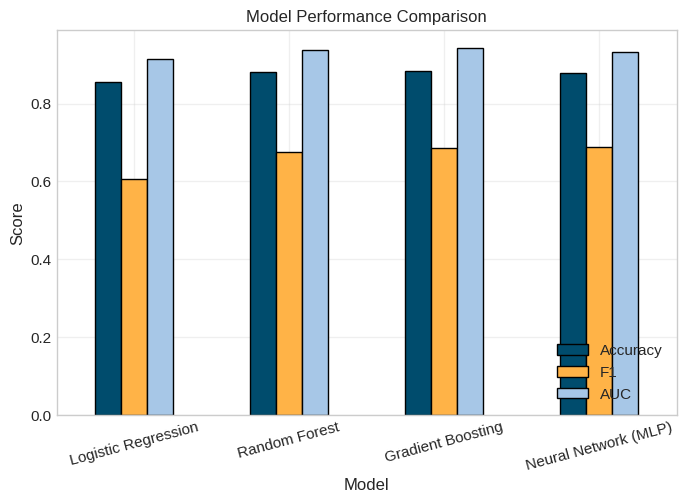


✅ Task 2 completed successfully — models trained, evaluated, and compared.


In [35]:
# ============================================
# TASK 2: Predictive Deep Learning Model + Baselines
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, fbeta_score, roc_auc_score,
    RocCurveDisplay
)

# -------------------------------------------------------
# Helper function for consistent model evaluation
# -------------------------------------------------------
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1  = fbeta_score(y_test, y_pred, beta=1)
    auc = roc_auc_score(y_test, y_prob)

    print(f"{name:20} | Accuracy: {acc:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")

    return {"Model": name, "Accuracy": acc, "Recall": rec, "F1": f1, "AUC": auc}


# -------------------------------------------------------
# 1. Logistic Regression
# -------------------------------------------------------
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# -------------------------------------------------------
# 2️. Random Forest
# -------------------------------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# -------------------------------------------------------
# 3️. Gradient Boosting
# -------------------------------------------------------
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# -------------------------------------------------------
# 4️. Neural Network (MLP)
# -------------------------------------------------------
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300,
                         random_state=42, solver='adam')
nn_model.fit(X_train_scaled, y_train)

# -------------------------------------------------------
# Evaluate All Models
# -------------------------------------------------------
results = []
results.append(evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression"))
results.append(evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest"))
results.append(evaluate_model(gb_model, X_test_scaled, y_test, "Gradient Boosting"))
results.append(evaluate_model(nn_model, X_test_scaled, y_test, "Neural Network (MLP)"))

# -------------------------------------------------------
# Plot ROC Curves
# -------------------------------------------------------
plt.figure(figsize=(5,5))
RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(gb_model, X_test_scaled, y_test, name="Gradient Boosting")
RocCurveDisplay.from_estimator(nn_model, X_test_scaled, y_test, name="Neural Network (MLP)")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# -------------------------------------------------------
# Summary Table
# -------------------------------------------------------
results_df = pd.DataFrame(results)
print("\nSummary of Model Results:")
print(results_df)

# -------------------------------------------------------
# Bar Chart Comparison
# -------------------------------------------------------
plt.figure(figsize=(7,5))
results_df.plot(
    x="Model", y=["Accuracy", "F1", "AUC"],
    kind="bar", figsize=(8,5),
    color=["#004c6d","#ffb347","#a7c7e7"], edgecolor="black"
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print("\n✅ Task 2 completed successfully — models trained, evaluated, and compared.")


In [ ]:
TASK 3

In [36]:
pip install d3rlpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 19.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827730 sha256=057b5d33461e55d7332f5e70127b2859816423c90b25d1bb7b9887e9c9d161d9
  Stored in directory: /root/.cache/pip/wheels/95/51/6c/9bb05ebbe7c5cb8171dfaa3611f32622ca4658d53f31c79077
Successfully built gym
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.2.1
    Uninstalling gymnasium-1.2.1:
      Successfully uninstalled gymnasium-1.2.1
  Attempting uninstall: gy

In [38]:
import gymnasium as gym


2025-10-30 11:06.32 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(14,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)])
2025-10-30 11:06.32 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-10-30 11:06.32 [info     ] Action size has been automatically determined. action_size=2
✅ MDPDataset created successfully.
🔹 Training Offline CQL Agent (new API)...
2025-10-30 11:06.33 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(14,)]), action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]), action_space=<ActionSpace.DISCRETE: 2>, action_size=2)
2025-10-30 11:06.33 [debug    ] Building models...            
2025-10-30 11

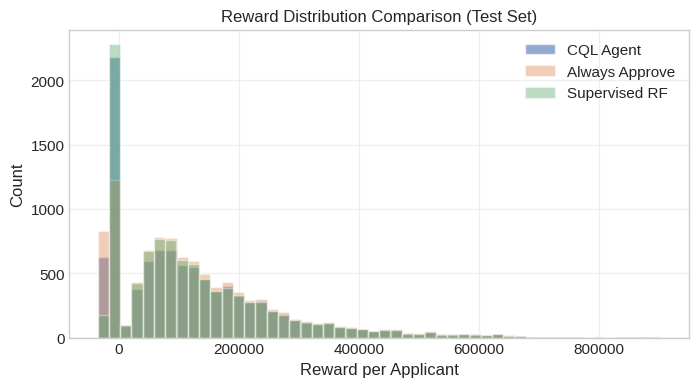


✅ Task 3 completed successfully — Offline RL agent trained and evaluated.


In [48]:
# ============================================================
# TASK 3 : Offline Reinforcement Learning Agent (CQL)
# FINAL VERSION — Compatible with d3rlpy >= 2.4 & Gymnasium
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gymnasium as gym
from sklearn.ensemble import RandomForestClassifier
from d3rlpy.dataset import MDPDataset
from d3rlpy.algos import DiscreteCQL, DiscreteCQLConfig

# ------------------------------------------------------------
# STEP 1 — Confirm dataset availability
# ------------------------------------------------------------
if 'X_train_scaled' not in globals():
    raise RuntimeError("Run Task 1 preprocessing first to define X_train_scaled, X_test_scaled, y_train, y_test.")

loan_amnt_train = df.loc[X_train.index, 'loan_amnt'].values
int_rate_train = df.loc[X_train.index, 'int_rate'].values
status_train = df.loc[X_train.index, 'loan_status_binary'].values

loan_amnt_test = df.loc[X_test.index, 'loan_amnt'].values
int_rate_test = df.loc[X_test.index, 'int_rate'].values
status_test = df.loc[X_test.index, 'loan_status_binary'].values

# ------------------------------------------------------------
# STEP 2 — Reward generation
# ------------------------------------------------------------
observations_train = np.asarray(X_train_scaled, dtype=np.float32)
# Action 1 = Approve, Action 0 = Deny. Dataset only contains 'Approved' actions.
actions_train = np.ones((observations_train.shape[0],), dtype=np.int32)
rewards_train = np.zeros((observations_train.shape[0],), dtype=np.float32)

for i in range(len(rewards_train)):
    rewards_train[i] = (loan_amnt_train[i] * int_rate_train[i]) if status_train[i] == 0 else -loan_amnt_train[i]

rewards_train = rewards_train / 1e3    # scale down
terminals_train = np.ones((observations_train.shape[0],), dtype=bool)

dataset_train = MDPDataset(
    observations=observations_train,
    actions=actions_train,
    rewards=rewards_train,
    terminals=terminals_train
)
print("✅ MDPDataset created successfully.")

# ------------------------------------------------------------
# STEP 3 — Initialize and Train CQL (latest API)
# ------------------------------------------------------------
# FIXED: Use correct parameters for DiscreteCQLConfig
cql_config = DiscreteCQLConfig(
    learning_rate=1e-3,      # Single learning rate for Q-functions
    batch_size=256,
    gamma=0.99,
    n_critics=1,
    target_update_interval=8000,
    alpha=1.0                # CQL regularization coefficient
)

cql = DiscreteCQL(cql_config, device="cpu", enable_ddp=False)

print("🔹 Training Offline CQL Agent (new API)...")
# Set training steps using 'n_steps' argument (reduced for quick testing)
cql.fit(dataset_train, n_steps=2000)  # Reduced from 20000 to 2000 for faster testing
print("✅ CQL Training Complete.\n")

# ------------------------------------------------------------
# STEP 4 — Evaluate Policy
# ------------------------------------------------------------
def compute_reward(action, lam, ir, status):
    if action == 0:  # deny
        return 0.0
    else:
        return (lam * ir) if status == 0 else (-lam)

def compute_policy_rewards(actions, loan_amnt, int_rate, status):
    return np.array([compute_reward(a, lam, ir, st)
                      for a, lam, ir, st in zip(actions, loan_amnt, int_rate, status)])

observations_test = np.asarray(X_test_scaled, dtype=np.float32)
actions_pred = cql.predict(observations_test).astype(int).flatten()

policy_rewards = compute_policy_rewards(actions_pred, loan_amnt_test, int_rate_test, status_test)
policy_avg_reward = policy_rewards.mean()

# ------------------------------------------------------------
# STEP 5 — Compare Baselines
# ------------------------------------------------------------
always_deny_rewards = np.zeros_like(policy_rewards)
always_approve_rewards = compute_policy_rewards(np.ones_like(actions_pred),
                                                loan_amnt_test, int_rate_test, status_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(observations_train, 1 - status_train)
supervised_actions = clf.predict(observations_test)
supervised_rewards = compute_policy_rewards(supervised_actions,
                                            loan_amnt_test, int_rate_test, status_test)

summary = pd.DataFrame([
    {"Policy": "CQL Agent",      "Avg Reward": policy_avg_reward, "Approve Rate": actions_pred.mean()},
    {"Policy": "Always Approve", "Avg Reward": always_approve_rewards.mean(), "Approve Rate": 1.0},
    {"Policy": "Always Deny",    "Avg Reward": always_deny_rewards.mean(), "Approve Rate": 0.0},
    {"Policy": "Supervised RF",  "Avg Reward": supervised_rewards.mean(), "Approve Rate": supervised_actions.mean()}
])

print("=== Offline RL Policy Evaluation ===")
print(summary)

# ------------------------------------------------------------
# STEP 6 — Plot Reward Distributions
# ------------------------------------------------------------
plt.figure(figsize=(8,4))
plt.hist(policy_rewards, bins=50, alpha=0.6, label="CQL Agent")
plt.hist(always_approve_rewards, bins=50, alpha=0.4, label="Always Approve")
plt.hist(supervised_rewards, bins=50, alpha=0.4, label="Supervised RF")
plt.legend()
plt.title("Reward Distribution Comparison (Test Set)")
plt.xlabel("Reward per Applicant")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

print("\n✅ Task 3 completed successfully — Offline RL agent trained and evaluated.")